In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import nltk
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/jcchu/Downloads/Fall 2022/Group_078-Fa22/American Films.csv')
df[:3]

,Film name,Genre,Plot,Directed by,Written by,Story by,Produced by,Starring,Cinematography,Edited by,...,Budget (mil dollar),Box office (mil dollar),VADER Sentiment,VADER negative,VADER neutral,VADER positive,VADER compound,VADER compound (absolute value),TextBlob subjectivity,TextBlob polarity
0,The 2nd (film),Action,"While picking up his son at his college dorm, ...",Brian Skiba,Eric Bromberg/ Paul Taegel,NaN,Geoffrey James Clark/ Ryan Phillippe/ Kirk Sha...,Ryan Phillippe/ Casper Van Dien/ Jack Griffo/ ...,Adam Biddle,Scott Conrad,...,NaN,0.012604,"{'neg': 0.056, 'neu': 0.804, 'pos': 0.139, 'co...",0.056,0.804,0.139,0.7845,0.7845,0.450000,0.016667
1,12 Rounds (film),Action,A sting operation to capture arms dealer Miles...,Renny Harlin,Daniel Kunka,NaN,Becki Cross Trujillo/ Mark Gordon/ Renny Harli...,John Cena/ Aidan Gillen/ Ashley Scott/ Steve H...,David Boyd,Brian Berdan,...,6.7,17.300000,"{'neg': 0.071, 'neu': 0.873, 'pos': 0.056, 'co...",0.071,0.873,0.056,-0.9610,0.9610,0.385748,-0.084798
2,13 Minutes (2021 film),Action,Four families in the fictional Oklahoma town o...,Lindsay Gossling,Lindsay Gossling,Travis Farncombe,Lindsay Gossling/ Travis Farncombe/ Karen Harn...,Trace Adkins/ Thora Birch/ Peter Facinelli/ An...,Steve Mason,Lisa Grootenboer,...,NaN,0.067413,"{'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'comp...",0.263,0.737,0.000,-0.9524,0.9524,0.431250,-0.031250


In [4]:
# get attributes of each plot
char_count = []
word_count = []
box_office = []
punct_count = []
upper_count = []
sent_count = []

for i in range(len(df)):
    text = df.loc[i]['Plot']
    # number of characters
    char_count.append(len(text))
    # number of words
    word_count.append(len(text.split(' ')))
    # box office
    box_office.append(df.loc[i]['Box office (mil dollar)'])
    # number of punctuation
    punct_count.append(len([c for c in text if c in string.punctuation]))
    # number of sentences
    sent_count.append(len(re.findall(r'[.!?]', text)))
    # number of uppercase
    upper_count.append(len(re.findall(r'[A-Z]', text)))

[Text(0.5, 0, 'Number of Characters'),
 Text(0, 0.5, 'Number of Upper Case Letters')]

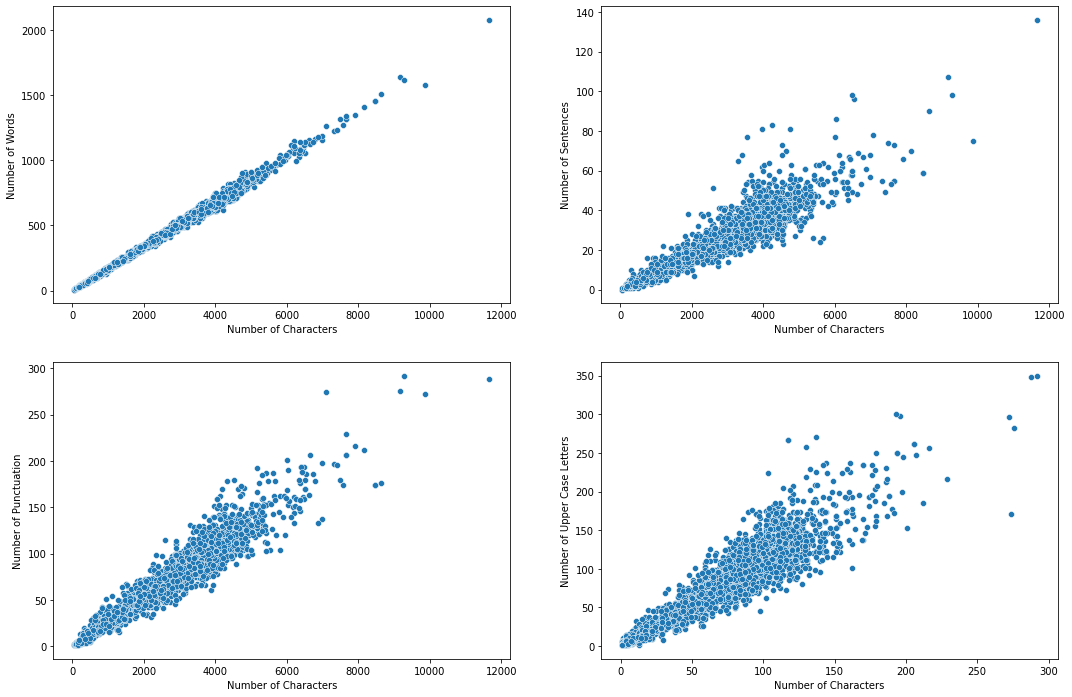

In [5]:
# plot char counts vs other counts
fig, ax = plt.subplots(2, 2, figsize=(18, 12))
ax1 = sns.scatterplot(x=char_count, y=word_count, ax=ax[0][0])
ax1.set(xlabel='Number of Characters', ylabel='Number of Words')
ax2 = sns.scatterplot(x=char_count, y=punct_count, ax=ax[1][0])
ax2.set(xlabel='Number of Characters', ylabel='Number of Punctuation')
ax3 = sns.scatterplot(x=char_count, y=sent_count, ax=ax[0][1])
ax3.set(xlabel='Number of Characters', ylabel='Number of Sentences')
ax4 = sns.scatterplot(x=punct_count, y=upper_count, ax=ax[1][1])
ax4.set(xlabel='Number of Characters', ylabel='Number of Upper Case Letters')


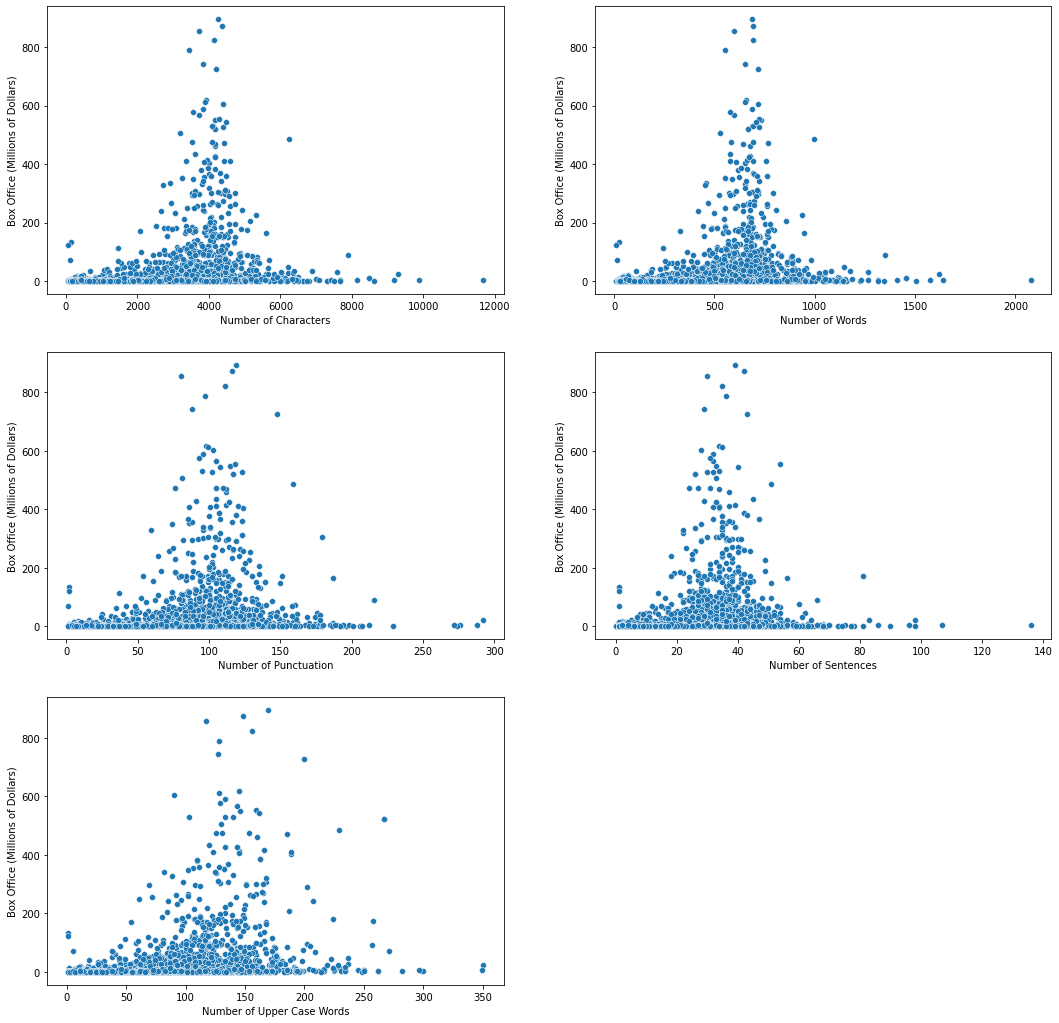

In [14]:
# plot count values vs box office
fig, ax = plt.subplots(3, 2, figsize=(18, 18))
ax1 = sns.scatterplot(x=char_count, y=box_office, ax=ax[0][0])
ax1.set(xlabel='Number of Characters', ylabel='Box Office (Millions of Dollars)')
ax2 = sns.scatterplot(x=word_count, y=box_office, ax=ax[0][1])
ax2.set(xlabel='Number of Words', ylabel='Box Office (Millions of Dollars)')
ax3 = sns.scatterplot(x=punct_count, y=box_office, ax=ax[1][0])
ax3.set(xlabel='Number of Punctuation', ylabel='Box Office (Millions of Dollars)')
ax4 = sns.scatterplot(x=sent_count, y=box_office, ax=ax[1][1])
ax4.set(xlabel='Number of Sentences', ylabel='Box Office (Millions of Dollars)')
ax5 = sns.scatterplot(x=upper_count, y=box_office, ax=ax[2][0])
ax5.set(xlabel='Number of Upper Case Words', ylabel='Box Office (Millions of Dollars)')
fig.delaxes(ax[2][1])

C:\Users\jcchu\AppData\Local\Temp\ipykernel_25708\1932330431.py:2: RuntimeWarning: divide by zero encountered in log
  ax1 = sns.scatterplot(x=sent_count, y=np.log(box_office), ax=ax[0])
C:\Users\jcchu\AppData\Local\Temp\ipykernel_25708\1932330431.py:4: RuntimeWarning: divide by zero encountered in log
  ax2 = sns.scatterplot(x=upper_count, y=np.log(box_office), ax=ax[1])


[Text(0.5, 0, 'Number of Uppercase'),
 Text(0, 0.5, 'Log of Box Office (Millions of Dollars)')]

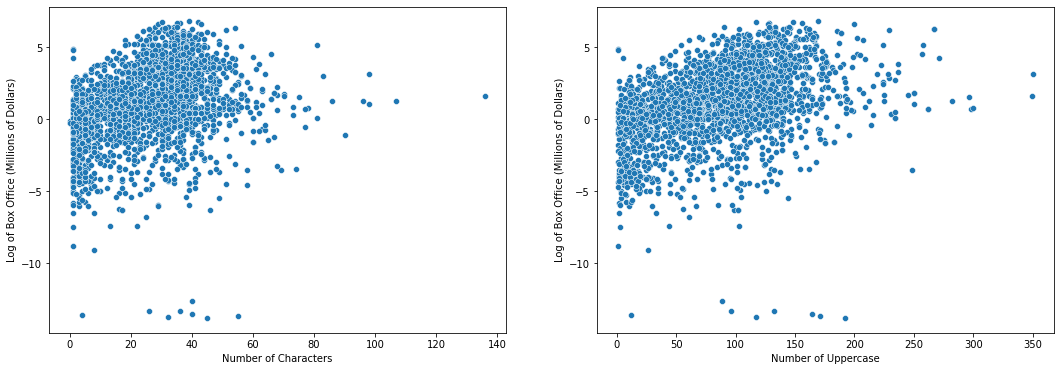

In [137]:
# plot count values vs log of box office
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax1 = sns.scatterplot(x=sent_count, y=np.log(box_office), ax=ax[0])
ax1.set(xlabel='Number of Characters', ylabel='Log of Box Office (Millions of Dollars)')
ax2 = sns.scatterplot(x=upper_count, y=np.log(box_office), ax=ax[1])
ax2.set(xlabel='Number of Uppercase', ylabel='Log of Box Office (Millions of Dollars)')

In [16]:
# gets the counts of each part of speech
def get_pos_count(text):
    tokens=nltk.word_tokenize(text)
    word_pos = []
    pos_count = defaultdict(int)
    for word, tag in nltk.pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
            pos_count['n'] += 1
        elif tag.startswith('VB'):
            pos = 'v'
            pos_count['v'] += 1
        elif tag.startswith('JJ'):
            pos = 'adj'
            pos_count['adj'] += 1
        elif tag.startswith('RB'):
            pos = 'adv'
            pos_count['adv'] += 1
        else:
            pos = 'a'
            pos_count['a'] += 1
        word_pos.append((word, pos))
    return word_pos, pos_count

In [21]:
# get part of speech of each plot
pos_count = []
noun_count = []
verb_count = []
adj_count = []
adv_count = []

for i in range(len(df)):
    text = df.iloc[i]['Plot']
    word_pos, pos = get_pos_count(text)
    pos_count.append(pos)
for i in pos_count:
    noun_count.append(i['n'])
    verb_count.append(i['v'])
    adj_count.append(i['adj'])
    adv_count.append(i['adv'])

[Text(0.5, 0, 'Number of Adverbs'),
 Text(0, 0.5, 'Box Office (Millions of Dollars)')]

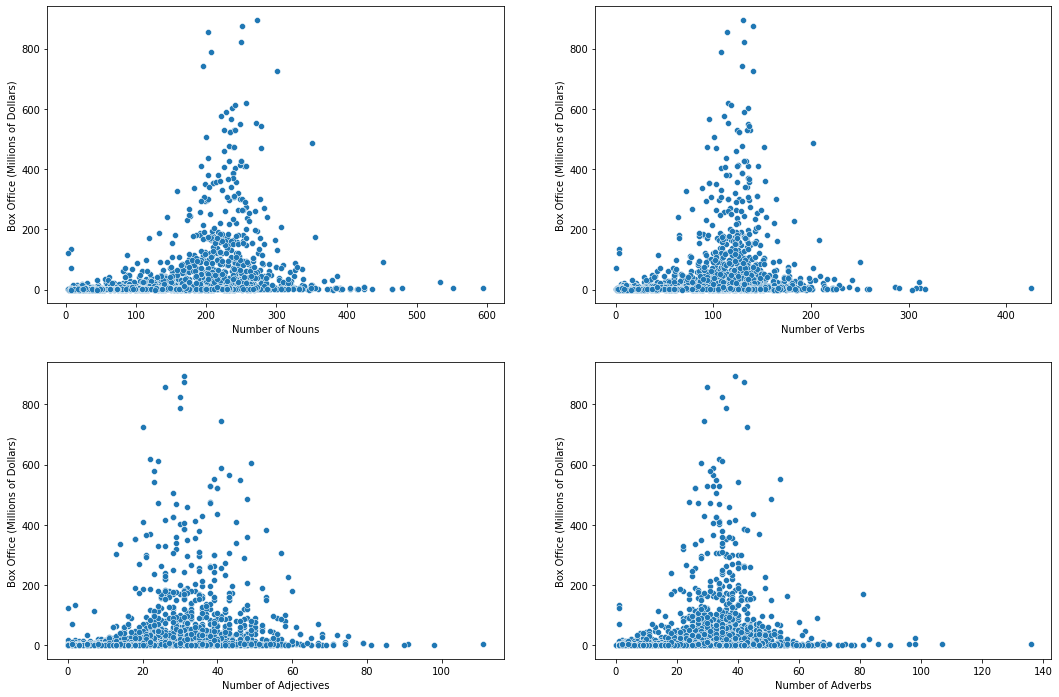

In [22]:
# plot counts of part of speech vs box office
fig, ax = plt.subplots(2, 2, figsize=(18, 12))
ax1 = sns.scatterplot(x=noun_count, y=box_office, ax=ax[0][0])
ax1.set(xlabel='Number of Nouns', ylabel='Box Office (Millions of Dollars)')
ax2 = sns.scatterplot(x=verb_count, y=box_office, ax=ax[0][1])
ax2.set(xlabel='Number of Verbs', ylabel='Box Office (Millions of Dollars)')
ax3 = sns.scatterplot(x=adj_count, y=box_office, ax=ax[1][0])
ax3.set(xlabel='Number of Adjectives', ylabel='Box Office (Millions of Dollars)')
ax4 = sns.scatterplot(x=sent_count, y=box_office, ax=ax[1][1])
ax4.set(xlabel='Number of Adverbs', ylabel='Box Office (Millions of Dollars)')